In [12]:
# Importing the necessary packages for the python program to function.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics
import matplotlib
from pylab import rcParams
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. Business Understanding.

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA. It is interesting to understand few aspects of the seattle Airnbnb data, understand the few inside aspects which is hidden inside the data.

Below are the few questions answered from the dataset:

1. The busiest month in Seattle AirBnb.


2. Which is the busiest month and what are the price variations during the year.


3. Most expensive vs Least expensive neighborhood along the different timeline.


4. What are the amenities i.e which features in houses that are playing crucial role while fixing the price.

# # 2. Data Understanding.

In [18]:
# Reading the Seatle Airbnb Listings datafile and Understandign the data
airbnb_seatle_lis=pd.read_csv('E:\\Udacity Project 1\\seattle\\listings.csv')
airbnb_seatle_lis=airbnb_seatle_lis.rename(columns={'id':'listing_id'})
no_listings=airbnb_seatle_lis['listing_id'].count()
no_hosts=airbnb_seatle_lis['host_id'].unique()
print("The number of listings - Houses that was listed in airbnb seatle:",no_listings)
print("The total number of hosts registered with airbnb seatle:",len(no_hosts))

The number of listings - Houses that was listed in airbnb seatle: 3818
The total number of hosts registered with airbnb seatle: 2751


In [14]:
airbnb_seatle_lis.describe()

,listing_id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [20]:
# Finding our the number of null values present in the listing dataset.
null_counts=airbnb_seatle_lis.isnull().sum(axis = 0).sort_values(ascending = False)
null_counts=null_counts[null_counts > 0]
null_counts.head()

license             3818
square_feet         3721
monthly_price       2301
security_deposit    1952
weekly_price        1809
dtype: int64

As we observe the heatmap we can infer that mostly review scores and values are highly correlated to one another, guests and bedrooms, bathrooms and bed are some of the dimensions which are related to one another.

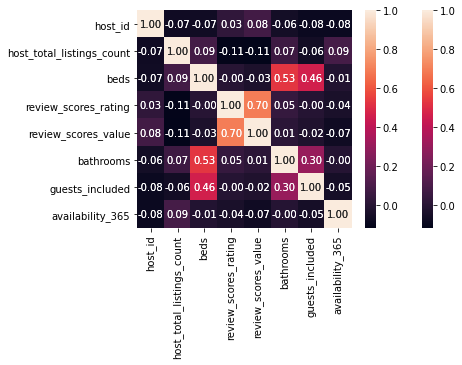

In [21]:
# Finding the correlation between the various dimensions
corr1=airbnb_seatle_lis[['host_id','host_total_listings_count','beds','review_scores_rating','review_scores_value','bathrooms',
                   'guests_included','availability_365']]
sns.heatmap(corr1.corr(), annot=True, fmt=".2f");corr1=airbnb_seatle_lis[['host_id','host_total_listings_count','beds','review_scores_rating','review_scores_value','bathrooms',
                   'guests_included','availability_365']]
sns.heatmap(corr1.corr(), annot=True, fmt=".2f");

Below are the columns with highest number of missing values, out 3818 entries license, square_feet , monthly_price, security deposit and weekly price have more than 50% missing values hence it is dropped from the data-frame.

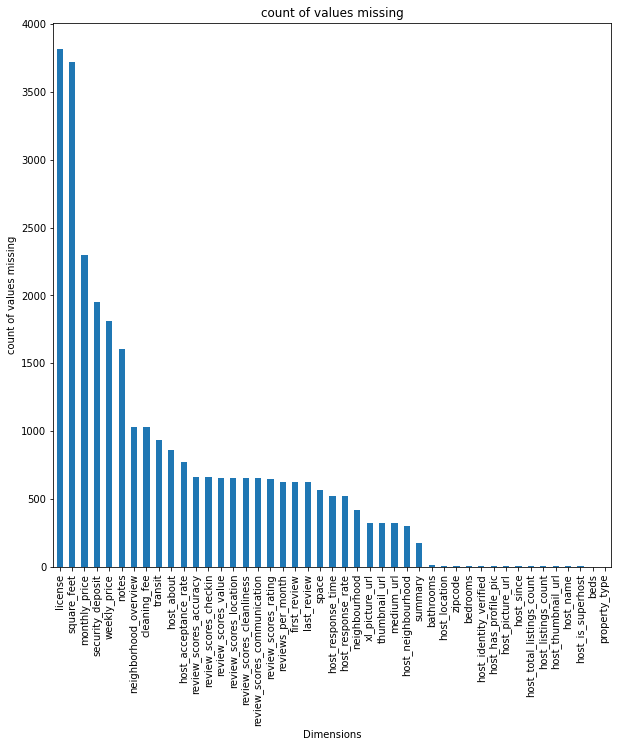

In [22]:
#Graphical Representaion of no of missing values in listings dataframe.
rcParams['figure.figsize'] = 10,10
null_counts.plot.bar(title='count of values missing')
plt.ylabel('count of values missing')
plt.xlabel('Dimensions')
plt.savefig('Missing Values in Listings.png')

In [23]:
# Reading the Airbnb seatle calender dataset 
airbnb_seatle_cal=pd.read_csv('E:\\Udacity Project 1\\seattle\\calendar.csv')
no_listings=airbnb_seatle_cal['listing_id'].count()
print("The number of listings - Houses that was listed in airbnb seatle:",no_listings)

The number of listings - Houses that was listed in airbnb seatle: 1393570


In [24]:
airbnb_seatle_cal.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [25]:
#Finding the number of nan in the dataset.
null_counts=airbnb_seatle_cal.isnull().sum(axis = 0).sort_values(ascending = False)
null_counts=null_counts[null_counts > 0]
null_counts.head()

price    459028
dtype: int64

The next step in Crisp DM process is to get ready these datasets by performing data wrangling procedures, handling the missing values, getting the dummy columns up for categorical variables.
To perform the data cleaning we shall create a function which will give the final data frames which are ready for analysis.

## 3. Data Preparation

Here we are going to drop the below columns since they are not used for analysis

'available','host_location','host_acceptance_rate','host_neighbourhood','host_total_listings_count', 'weekly_price', 'monthly_price','security_deposit', 'cleaning_fee', 'calendar_updated','listing_url','last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description','license','square_feet','security_deposit','experiences_offered', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode','neighborhood_overview','notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url','xl_picture_url', 'host_url', 'host_name','host_about', 'host_thumbnail_url', 'host_picture_url','city', 'state', 'market', 'smart_location','country_code', 'country', 'latitude', 'longitude','is_location_exact', 'square_feet', 'has_availability','availability_30','availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped','host_since','first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'price_y','reviews_per_month','host_response_time','property_type','host_is_superhost','host_has_profile_pic','host_identity_verified'


The below columns are categorical so they are converted into dummy columns

host_verifications, amenities

replacing other numerical colums like bedrooms bathrooms etc with mode

In [26]:
def clean_dataset(df1,df2):
    '''OUTPUT
    dataframe - 1. Final Df which is cleaned and format required for further analysis with dummies for categorical
                2. df - which is cleaned and only necessary columns for Random forest regresion analysis.
    This function cleans df1 and df2 using the following steps to produce X and y:
    1. Drop all the unwanted columns for analysis
    2. Rename the column names.
    3. Convert string column with numerical data to normal numeric columns
    4. Create dummy columns for all the categorical variables
    5. Replace the missing value with mean or mode for non categorical columns'''
    df = pd.merge(df1, df2, on = 'listing_id')
    drop_col_list=['available','host_location','host_acceptance_rate','host_neighbourhood','host_total_listings_count', 
              'weekly_price', 'monthly_price','security_deposit', 'cleaning_fee', 'calendar_updated','listing_url',
              'last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description','license','square_feet','security_deposit',             
              'experiences_offered', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode','neighborhood_overview', 
              'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url','xl_picture_url', 'host_url', 'host_name', 
              'host_about', 'host_thumbnail_url', 'host_picture_url','city', 'state', 'market', 'smart_location', 
              'country_code', 'country', 'latitude', 'longitude','is_location_exact', 'square_feet', 'has_availability', 
              'availability_30','availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped','host_since',
              'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'price_y','reviews_per_month',
              'host_response_time','property_type','host_is_superhost','host_has_profile_pic','host_identity_verified']
    df = df.drop(columns = drop_col_list)
    df = df.dropna(subset=['price_x'], axis=0)
    df['price'] = df['price_x'].astype(str).str.replace("[$, ]", "").astype("float")
    df = df.drop(columns = ['price_x'])
    df.reset_index(drop=True, inplace=True)
    df['host_response_rate'] = df['host_response_rate'].astype(str).str.replace("%", "").astype("float")
    df['host_response_rate'].fillna(df['host_response_rate'].mean(), inplace = True)    
    df['host_listings_count'].fillna(df['host_listings_count'].mean(), inplace = True)
    df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
    df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
    df['beds'] = df['beds'].fillna(df['beds'].mode()[0])
    rating = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
            'review_scores_checkin', 'review_scores_communication', 'review_scores_location','review_scores_value']
    for column in rating:
        df[column].fillna(df[column].mean(), inplace = True)
    df['extra_people_charge']=df['extra_people'].str.replace("[$, ]", "").astype("float")
    df.drop(columns=['extra_people'])
    df['Year']=[int(d.split('-')[0]) for d in df.date]
    df['Month']=[int(d.split('-')[1]) for d in df.date]
    df['Day']=[int(d.split('-')[2]) for d in df.date]
    df.drop(columns=['date'])
    df.dropna().reset_index()
    df['amenities'] =  df['amenities'].apply(lambda x: x.replace('{','').replace('}','')) 
    amenties_dummies=df['amenities'].str.get_dummies(sep=',')
    amenties_dummies.reset_index(drop=True, inplace=True)
    df['host_verifications'] =  df['host_verifications'].apply(lambda x: x.replace('[','').replace(']','')) 
    host_verifications_dummies = df['host_verifications'].str.get_dummies(sep=',')
    host_verifications_dummies.reset_index(drop=True, inplace=True)
    df=df.drop(['amenities', 'host_verifications'], axis=1)
    df.dropna().reset_index()
    final_df= pd.concat([df, amenties_dummies,host_verifications_dummies],axis=1)
    final_df.dropna().reset_index()
    return final_df,df

In [27]:
final_df,df=clean_dataset(airbnb_seatle_cal,airbnb_seatle_lis)
final_df.head()

,listing_id,date,host_id,host_response_rate,host_listings_count,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,bedrooms,...,'phone','photographer','reviews','sent_id','weibo','email','google','phone','reviews',None
0,241032,2016-01-04,956883,96.0,3.0,Queen Anne,Entire home/apt,4,1.0,1.0,...,1,0,1,0,0,1,0,0,0,0
1,241032,2016-01-05,956883,96.0,3.0,Queen Anne,Entire home/apt,4,1.0,1.0,...,1,0,1,0,0,1,0,0,0,0
2,241032,2016-01-13,956883,96.0,3.0,Queen Anne,Entire home/apt,4,1.0,1.0,...,1,0,1,0,0,1,0,0,0,0
3,241032,2016-01-14,956883,96.0,3.0,Queen Anne,Entire home/apt,4,1.0,1.0,...,1,0,1,0,0,1,0,0,0,0
4,241032,2016-01-18,956883,96.0,3.0,Queen Anne,Entire home/apt,4,1.0,1.0,...,1,0,1,0,0,1,0,0,0,0


Capitol hill, central area and downtown are the top three places where the listings are high. From the initial description we can infer that these were the places where visitors were high and hence the listings were high.

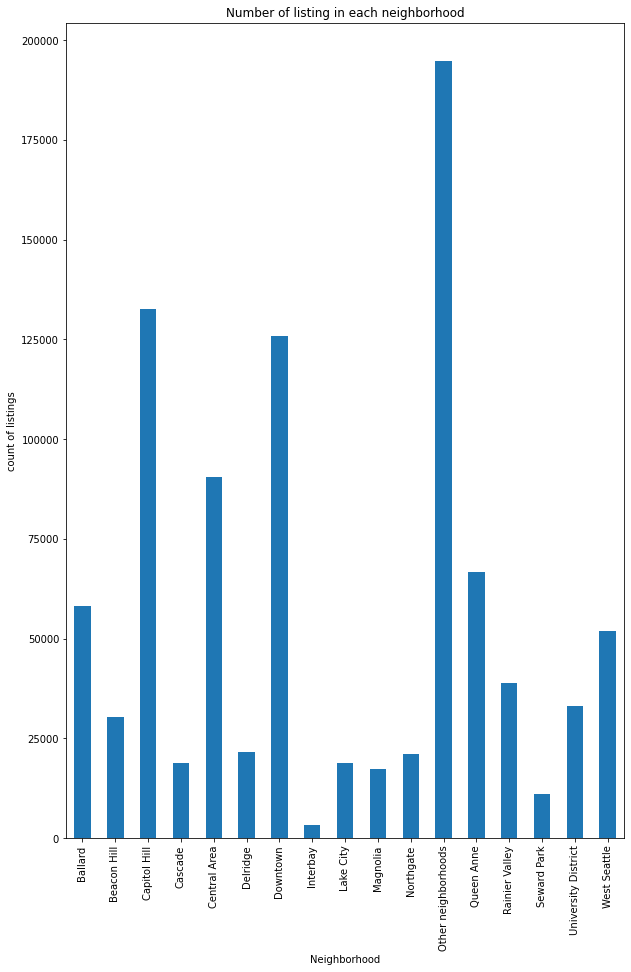

In [28]:
no_of_listing_per_area = final_df.groupby(['neighbourhood_group_cleansed'])['listing_id'].count()
rcParams['figure.figsize'] = 10,15
no_of_listing_per_area.plot.bar(title='Number of listing in each neighborhood')
plt.ylabel('count of listings')
plt.xlabel('Neighborhood')
plt.savefig('Number of listing pere neighborhood.png')

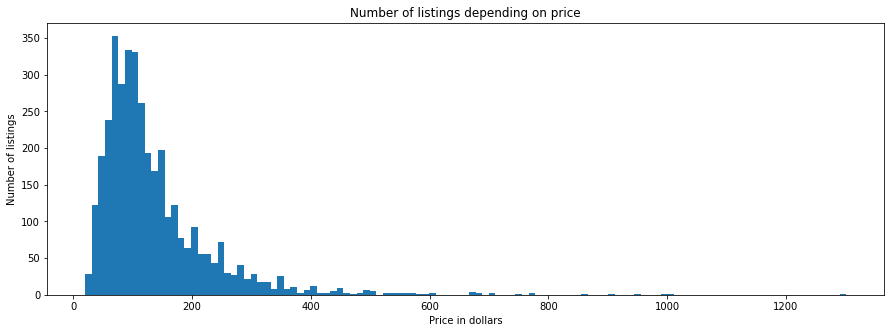

In [29]:
#Average price of each listing id
plt.figure(figsize=(15,5))
avg_price_listing = final_df.groupby('listing_id').mean()['price']
plt.hist(avg_price_listing,bins='auto')
plt.ylabel('Number of listings')
plt.xlabel('Price in dollars')
plt.title('Number of listings depending on price')
plt.savefig('Average Price pere listing.png')
plt.show()

The prices are right skewed or positively skewed, indicating most of the prices are on the higher side above the mean value in this case we can infer mean is around 120$.

## 4. Answering the questions.

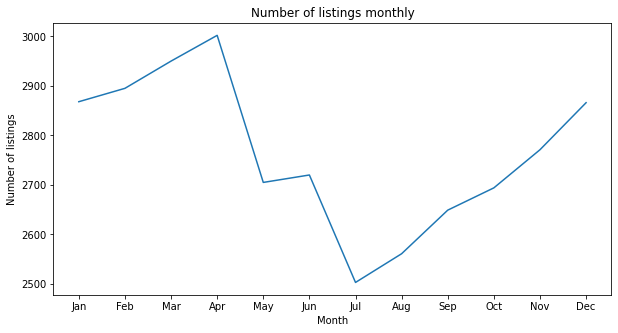

In [30]:
listings_monthly=final_df[final_df['Year'] == 2016].groupby('Month')['listing_id'].nunique()
plt.figure(figsize=(10,5))
plt.plot(listings_monthly)
plt.xticks((np.arange(1, 13, step=1)), ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Number of listings')
plt.xlabel('Month')
plt.title('Number of listings monthly')
plt.savefig('Busiest time in seattle.png')
plt.show()

If we closely observe graph we can infer that from April to July i.e. the summers are basically busier as we can see the number of listings are low and it gradually pics up after July.
Also important is that we need to observe the price variation, it is general the prices are high during the summers.

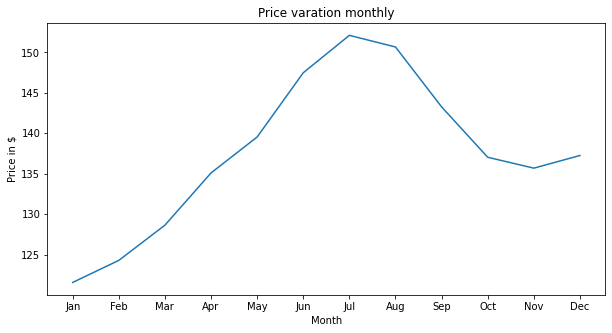

In [31]:
montly_avg_price = final_df[final_df['Year'] == 2016].groupby(['Month'])['price'].mean()
plt.figure(figsize=(10,5))
plt.plot(montly_avg_price)
plt.xticks((np.arange(1, 13, step=1)), ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Price in $')
plt.xlabel('Month')
plt.title('Price varation monthly')
plt.savefig('Price variation.png')
plt.show()

The results are as usual the prices starts to rise from the month of May and reaches peak in mid June and then starts to decline till November. The upper trend is again observed as the Christmas dates are nearing.
Our second question which needs to be answered was which are the neighborhoods that are most expensive and on the other hand which are affordable.


Text(0.5, 1.0, 'Average price for neighbourhood')

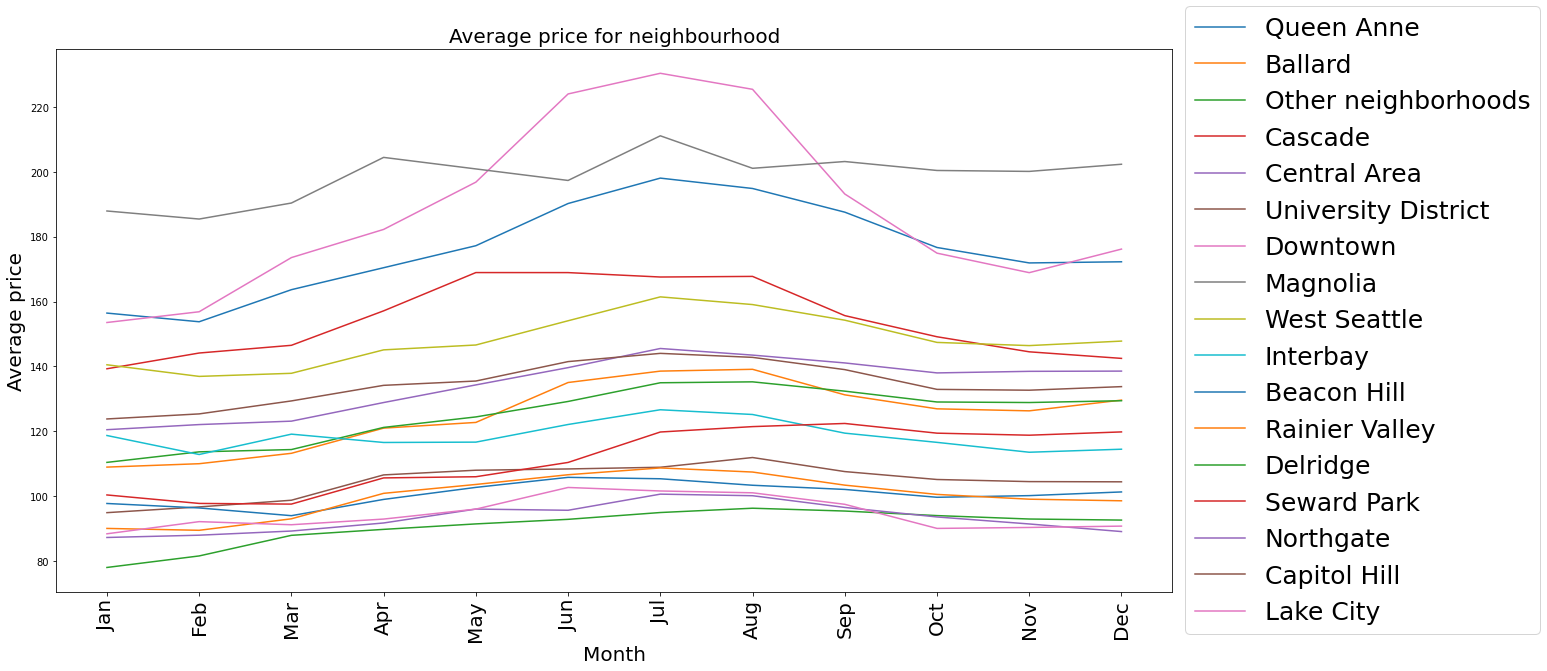

In [32]:
from datetime import datetime
pice_by_area=final_df.groupby(['Month','neighbourhood_group_cleansed']).mean().reset_index()
list_of_neighbourhoods= final_df['neighbourhood_group_cleansed'].unique()
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
for area in list_of_neighbourhoods:
    ax.plot(pice_by_area[pice_by_area['neighbourhood_group_cleansed'] == area]['Month'],
             pice_by_area[pice_by_area['neighbourhood_group_cleansed'] == area]['price'],
             label = area)
box = ax.get_position()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
plt.xticks((np.arange(1, 13, step=1)), ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],fontsize=20, rotation=90)
plt.ylabel('Average price',fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.savefig('Price variation.png')
plt.title('Average price for neighbourhood',fontsize=20)

The highest average price is downtown which is not surprising as it was expected answer. The other inference found was irrespective of the neighborhood the price kept increasing during summer.

In [33]:
random_reg=df.select_dtypes(exclude=['object'])
X = random_reg.drop(columns = ['price'])
y = random_reg[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [34]:
forest = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=42, n_jobs=-1)
forest.fit(X_train, y_train)

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

In [35]:

feature_importances = pd.DataFrame(forest.feature_importances_,index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(10)

,importance
bedrooms,0.379512
bathrooms,0.162932
accommodates,0.055653
host_id,0.052499
listing_id,0.049238
Month,0.042745
extra_people_charge,0.035197
host_listings_count,0.032396
review_scores_rating,0.028663
number_of_reviews,0.024891


<Figure size 576x576 with 0 Axes>

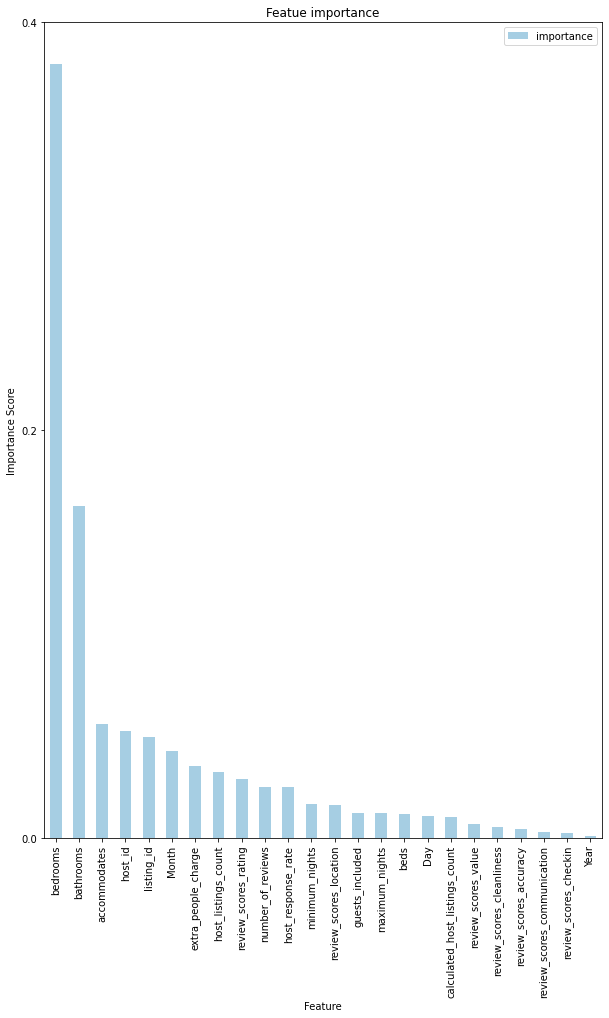

In [36]:
plt.figure(figsize=(8,8))
feature_importances.plot.bar(color=plt.cm.Paired(np.arange(len(feature_importances))))
plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.title('Featue importance')
plt.yticks(np.arange(0, 0.5, step=0.2))

It is clear from the graph that number of bedrooms, bathrooms, month and some of the reviews are some of the key features that are leading the way for fixing the price.
Overall the summers are busy in Seattle city in terms of bookings and also the pricing is on the upper end. The downtown, Queen Anne, Cascade are some of the expensive neighborhoods to stay.